In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
SEED = 42 # Random seed for reproducibility

## Preprocessing

In [3]:
raw_data = pd.read_csv(os.path.join('..','..','data','raw','Credit Card Transactions Fraud Detection Dataset 2019.csv'))
raw_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
data = raw_data.copy(deep=True)
data['full_name'] = data['first'] + ' ' + data['last']

data['dob'] = pd.to_datetime(data['dob'])
data['dob'] = (data['dob'] - data['dob'].min()) // pd.Timedelta('1s')

data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['hour_of_day'] = data['trans_date_trans_time'].dt.hour

data = data.drop(['Unnamed: 0', 'first', 'last', 'trans_date_trans_time'], axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   cc_num       1296675 non-null  int64  
 1   merchant     1296675 non-null  object 
 2   category     1296675 non-null  object 
 3   amt          1296675 non-null  float64
 4   gender       1296675 non-null  object 
 5   street       1296675 non-null  object 
 6   city         1296675 non-null  object 
 7   state        1296675 non-null  object 
 8   zip          1296675 non-null  int64  
 9   lat          1296675 non-null  float64
 10  long         1296675 non-null  float64
 11  city_pop     1296675 non-null  int64  
 12  job          1296675 non-null  object 
 13  dob          1296675 non-null  int64  
 14  trans_num    1296675 non-null  object 
 15  unix_time    1296675 non-null  int64  
 16  merch_lat    1296675 non-null  float64
 17  merch_long   1296675 non-null  float64
 18  is

In [7]:
data.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,full_name,hour_of_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,3495,"Psychologist, counselling",1999382400,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,Jennifer Banks,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,149,Special educational needs teacher,1692748800,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Stephanie Gill,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,...,4154,Nature conservation officer,1174608000,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,Edward Sanchez,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,...,1939,Patent attorney,1331769600,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,Jeremy White,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,...,99,Dance movement psychotherapist,1937865600,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,Tyler Garcia,0


## Feature engineering

In [8]:
output_feature = pd.DataFrame(data[['is_fraud']])

# We won't use the temporal features for now
num_features = ['amt', 'hour_of_day']
cat_features = ['merchant', 'category', 'job']

In [9]:
cat_features_df = pd.DataFrame(data[cat_features])

for feature in cat_features:
    print(f'{feature}: {cat_features_df[feature].nunique()}')

merchant: 693
category: 14
job: 494


In [10]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
cat_features_df = pd.DataFrame(encoder.fit_transform(cat_features_df), columns=cat_features)

<Axes: xlabel='amt', ylabel='Count'>

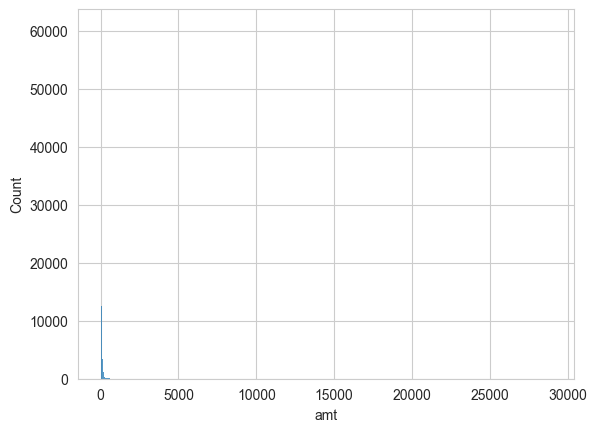

In [11]:
sns.histplot(data['amt'])

In [12]:
num_features_df = pd.DataFrame(data[num_features])
# num_features_df['amt'] = np.log1p(num_features_df['amt'])

In [13]:
input_features = pd.concat([num_features_df, cat_features_df], axis=1)
input_features.head()

,amt,hour_of_day,merchant,category,job
0,4.97,0,514.0,8.0,370.0
1,107.23,0,241.0,4.0,428.0
2,220.11,0,390.0,0.0,307.0
3,45.00,0,360.0,2.0,328.0
4,41.96,0,297.0,9.0,116.0


In [14]:
data['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

### Split dataset

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(input_features, output_feature, stratify=output_feature, test_size=0.2, random_state=42)

## Modelling


### Resampling training data

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.2,random_state=SEED)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

y_train_resampled['is_fraud'].value_counts()

is_fraud
0    1031335
1     206267
Name: count, dtype: int64

In [18]:
from typing import List, Callable
from time import time

def train_model(model, x_train, y_train):
    print(f'Training {model.__class__.__name__}')
    
    start = time()
    model.fit(x_train, y_train)
    elapsed_time = time() - start
    
    print(f'{model.__class__.__name__} trained in {elapsed_time:.2f}s')
    
    return model

def evaluate_model(model, x_test, y_test, metrics: List[Callable]):
    y_pred = model.predict(x_test)
    
    return {
        metric.__name__: metric(y_test, y_pred) for metric in metrics
    }

### Training models

Used:
- Logistic Regression
- Decision Tree
- SGD
- XGBoost
- Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

models = [
    LogisticRegression(random_state=SEED, max_iter=1000),
    DecisionTreeClassifier(max_depth=10, random_state=SEED),
    SGDClassifier(random_state=SEED),
    XGBClassifier(random_state=SEED),
    RandomForestClassifier(n_estimators=100, max_depth=10, random_state=SEED),
]

for model in models:    
    train_model(model, x_train_resampled, y_train_resampled.values.ravel())

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/quangnguyen/Library/Python/3.9/lib/python/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <B9202094-7D52-318C-99CF-7034B0E9F28D> /Users/quangnguyen/Library/Python/3.9/lib/python/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


In [20]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

model_evaluations = []
metric_functions = [accuracy_score, f1_score, recall_score, precision_score]

for model in models:
    results = {}
    results['model'] = model.__class__.__name__
    results.update(evaluate_model(model, x_test, y_test, metric_functions))
    model_evaluations.append(results)
    
model_evaluations = pd.DataFrame(model_evaluations)
model_evaluations.set_index('model', inplace=True)
model_evaluations

,accuracy_score,f1_score,recall_score,precision_score
model,,,,
LogisticRegression,0.988108,0.339615,0.528314,0.250237
DecisionTreeClassifier,0.993422,0.593616,0.830113,0.461995
SGDClassifier,0.951457,0.149564,0.737508,0.083221
XGBClassifier,0.994343,0.635347,0.851432,0.506741
RandomForestClassifier,0.994127,0.626441,0.850766,0.495730


### Hyper-tuning XGBClassifier

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

param_grid_xgb_1 = {
    'max_depth': [5, 10, 15],
    'min_child_weight': [1, 3, 5],
}

# Perform sequential grid search on XGBClassifier
xgb = XGBClassifier(random_state=SEED)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

xgb_grid_1 = GridSearchCV(xgb, 
                        param_grid=param_grid_xgb_1, 
                        scoring='f1',
                        cv=cv,
                        n_jobs=-1)

xgb_grid_1.fit(x_train_resampled, y_train_resampled)
print(f'Best parameters: {xgb_grid_1.best_params_}')

Best parameters: {'max_depth': 15, 'min_child_weight': 1}


In [22]:
param_grid_xgb_2 = {
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

xgb_1 = XGBClassifier(random_state=SEED, **xgb_grid_1.best_params_)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

xgb_grid_2 = GridSearchCV(xgb,
                        param_grid=param_grid_xgb_2,
                        scoring='f1',
                        cv=cv,
                        n_jobs=-1)

xgb_grid_2.fit(x_train_resampled, y_train_resampled)
print(f'Best parameters: {xgb_grid_2.best_params_}')

Best parameters: {'colsample_bytree': 1.0, 'subsample': 1.0}


In [23]:
param_grid_xgb_3 = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
}

xgb_2 = XGBClassifier(random_state=SEED, **xgb_grid_1.best_params_, **xgb_grid_2.best_params_)

xgb_grid_3 = GridSearchCV(xgb,
                        param_grid=param_grid_xgb_3,
                        scoring='f1',
                        cv=cv,
                        n_jobs=-1)

xgb_grid_3.fit(x_train_resampled, y_train_resampled)
print(f'Best parameters: {xgb_grid_3.best_params_}')

Best parameters: {'learning_rate': 0.3, 'n_estimators': 300}


In [24]:
best_params = {**xgb_grid_1.best_params_, **xgb_grid_2.best_params_, **xgb_grid_3.best_params_}

print(best_params)

{'max_depth': 15, 'min_child_weight': 1, 'colsample_bytree': 1.0, 'subsample': 1.0, 'learning_rate': 0.3, 'n_estimators': 300}


In [32]:
xgb_best = XGBClassifier(random_state=SEED, **best_params)

train_model(xgb_best, x_train_resampled, y_train_resampled)

res_df_xgb = pd.DataFrame([evaluate_model(xgb_best, x_test, y_test, metric_functions)])

res_df_xgb

Training XGBClassifier
XGBClassifier trained in 16.31s


,accuracy_score,f1_score,recall_score,precision_score
0,0.996186,0.6982,0.762159,0.644144


### Hyper-tuning Random Forest Classifier

In [26]:
rf = RandomForestClassifier(random_state=SEED)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
}

rf_grid = GridSearchCV(rf,
                        param_grid=param_grid_rf,
                        scoring='f1',
                        cv=cv,
                        n_jobs=10)

# Fixing the DataConversionWarning by using ravel()
rf_grid.fit(x_train_resampled, y_train_resampled.values.ravel())
print(f'Best parameters: {rf_grid.best_params_}')

Best parameters: {'max_depth': 15, 'n_estimators': 200}


In [27]:
rf_best = RandomForestClassifier(random_state=SEED, **rf_grid.best_params_)

train_model(rf_best, x_train_resampled, y_train_resampled)

res_df_rf = pd.DataFrame([evaluate_model(rf_best, x_test, y_test, metric_functions)])

res_df_rf

Training RandomForestClassifier


c:\Users\BAOHUY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier trained in 408.36s


,accuracy_score,f1_score,recall_score,precision_score
0,0.995566,0.684586,0.831446,0.581818


## Visualization of both hypertuned models (XGBoost & Random Forest) performance

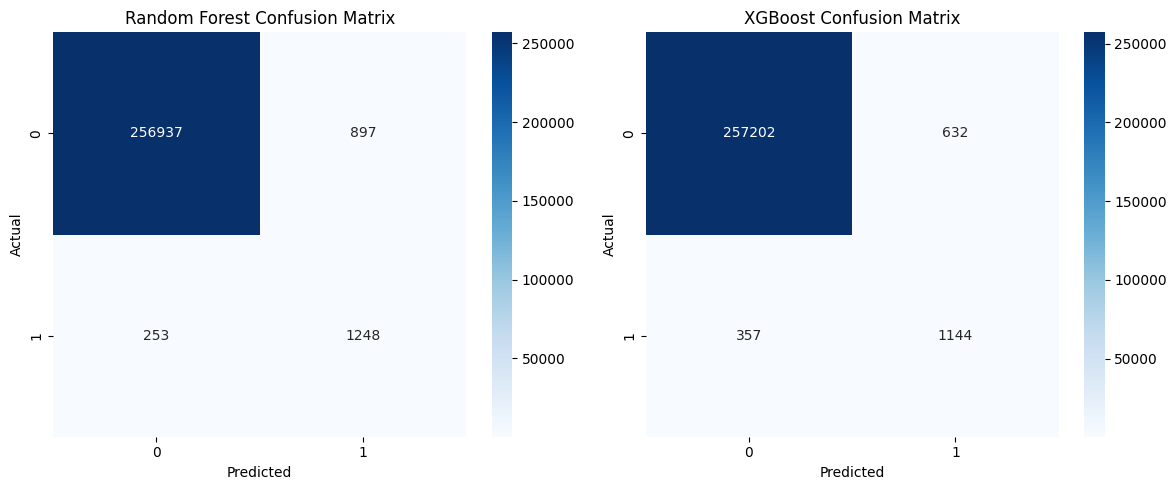

,accuracy_score,f1_score,recall_score,precision_score
XGBoost,0.996186,0.698200,0.762159,0.644144
Random Forest,0.995566,0.684586,0.831446,0.581818


In [34]:
from sklearn.metrics import confusion_matrix

y_pred_rf = rf_best.predict(x_test)
y_pred_xgb = xgb_best.predict(x_test)

conf_rf = confusion_matrix(y_test, y_pred_rf)
conf_xgb = confusion_matrix(y_test, y_pred_xgb)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_rf, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Random Forest Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(conf_xgb, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('XGBoost Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

metrics_df = pd.concat([res_df_xgb, res_df_rf], keys=['XGBoost', 'Random Forest'])
metrics_df.index = metrics_df.index.droplevel(1)
metrics_df